# Laboratorio 2 parte 1: Deep Learning


1. Exploración y análisis del dataset

In [1]:
import os

ruta = "chest_xray" # Define la ruta base del dataset, solo hay que colocar el nombre de la carpeta ya que el notebook se encuentra en la misma ubicación

for subdir in ['test', 'train', 'val']: # Recorre cada una de las subcarpetas de la ruta lo que corresponde a nuestro conjunto de datos (test, train, val)
    print(f"Conjunto: {subdir}") # Imprime el nombre de la carpeta actual
    total_conjunto = 0 # Inicializa el contador de imágenes para la carpeta actual
    for cat in os.listdir(os.path.join(ruta, subdir)): # Recorre cada una de las categorías dentro de la carpeta actual (normal, pneumonia)
        path = os.path.join(ruta, subdir, cat) # Construye la ruta completa a la categoría actual, por ejemplo, chest_xray/train/normal
        num = len(os.listdir(path)) # Cuenta el número de archivos (imágenes) en la categoría actual
        total_conjunto += num # Suma el número de imágenes de la categoría actual al total de la carpeta
        print(f"   {cat}: {num} imagenes") # Imprime el nombre de la categoría y el número de imágenes que contiene
    print(f"total en {subdir}: {total_conjunto} imagenes") # Imprime el total de imágenes en la carpeta actual



Conjunto: test
   NORMAL: 234 imagenes
   PNEUMONIA: 390 imagenes
total en test: 624 imagenes
Conjunto: train
   NORMAL: 1341 imagenes
   PNEUMONIA: 3875 imagenes
total en train: 5216 imagenes
Conjunto: val
   NORMAL: 8 imagenes
   PNEUMONIA: 8 imagenes
total en val: 16 imagenes


In [2]:
total_clase = {} # Diccionario para almacenar el total de imágenes por clase, es decir, cuantas imágenes hay de NORMAL y PNEUMONIA
tipos_archivo = {} # Diccionario para almacenar los tipos de archivos por clase, es decir, las extensiones de los archivos como .jpeg o .png

for subdir in ['test', 'train', 'val']: # Recorre cada subdirectorio en la ruta chest_xray
    for category in os.listdir(os.path.join(ruta, subdir)): # Recorre cada categoría de los subdirectorios
        path = os.path.join(ruta, subdir, category) # Ruta completa a la categoría como por ejemplo: chest_xray/train/NORMAL
        archivos = os.listdir(path) # Lista de archivos en la categoría, es decir que tipo de imágenes hay
        total_clase[category] = total_clase.get(category, 0) + len(archivos) # Suma el total de imágenes por clase, es decir cuantas hay de NORMAL y PNEUMONIA
        for imagen in archivos: # Recorre cada imagen en cada carpeta de NORMAL y PNEUMONIA
            ext = os.path.splitext(imagen)[1] # Obtiene la extensión del archivo, por ejemplo .jpeg o .png
            if category not in tipos_archivo: # Si la categoría no está en el diccionario, inicializa un conjunto vacio, en la primera iteracion se crea el conjunto y como solo hay uno no se crean mas.
                tipos_archivo[category] = set() # Inicializa un conjunto vacío para la categoría
            tipos_archivo[category].add(ext) # Agrega la extensión al conjunto de tipos de archivo para esa categoría

print("\n Total de imágenes por clase en todo el dataset:")
for clase, total in total_clase.items():
    print(f"   {clase}: {total} imagenes")

print("\n Total de imágenes en el dataset:", sum(total_clase.values()), "imagenes")

print("\n Tipos de archivos por clase:")
for clase, exts in tipos_archivo.items():
    print(f"   {clase}: {', '.join(exts)}")


 Total de imágenes por clase en todo el dataset:
   NORMAL: 1583 imagenes
   PNEUMONIA: 4273 imagenes

 Total de imágenes en el dataset: 5856 imagenes

 Tipos de archivos por clase:
   NORMAL: .jpeg
   PNEUMONIA: .jpeg


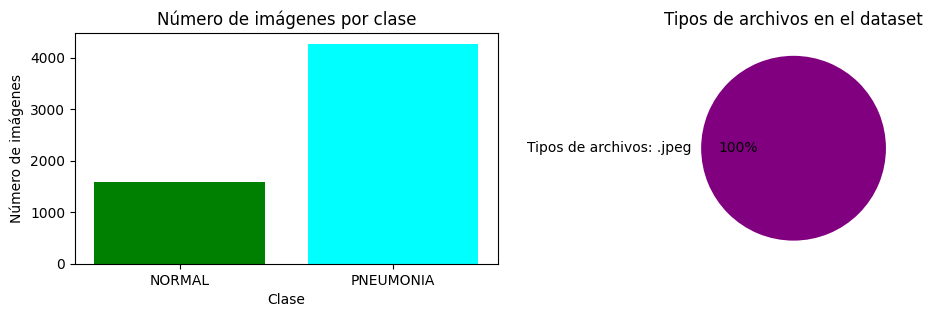

In [3]:
import matplotlib.pyplot as plt

#grafico de barras
labels = list(total_clase.keys()) # Obtiene las etiquetas de las clases (NORMAL y PNEUMONIA)
counts = list(total_clase.values()) # Obtiene los conteos de imágenes por clase

total_tipo = set() # lista sin valores repetidos
for exts in tipos_archivo.values():
    total_tipo.update(exts)


plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
plt.bar(labels, counts, color=['green', 'cyan']) # Crea un gráfico de barras con las etiquetas y conteos
plt.title('Número de imágenes por clase') # Título del gráfico
plt.xlabel('Clase') # Etiqueta del eje x
plt.ylabel('Número de imágenes') # Etiqueta del eje y

#grafico de pastel por tipo de archivo
plt.subplot(1,2,2)
plt.pie([len(total_tipo)], labels=['Tipos de archivos: ' + ', '.join(total_tipo)], autopct='%d%%', colors=['purple']) # Crea un gráfico de pastel con los tipos de archivos
plt.title('Tipos de archivos en el dataset') # Título del gráfico   
plt.show() # Muestra el gráfico

Resolución promedio: 1429.97 x 1098.40 píxeles
Resolución mínima: 452 x 156 píxeles
Resolución máxima: 2694 x 2625 píxeles


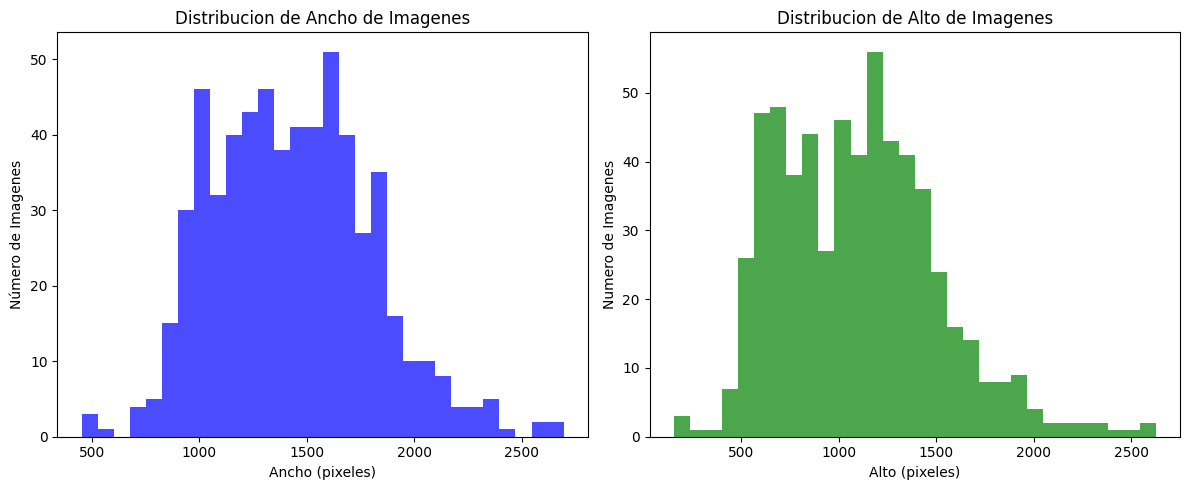

In [4]:
import numpy as np
import random
from PIL import Image


# Listas para almacenar los anchos y altos de las imágene
ancho = []
alto = []

for i, category in enumerate(['NORMAL', 'PNEUMONIA']):
    path = os.path.join(ruta, 'train', category)
    images = os.listdir(path)
    muestra = random.sample(images, 300)  # Muestra aleatoria de 200 imágenes por categoría
    for img_name in muestra: 
        img_path = os.path.join(path, img_name) 
        img = Image.open(img_path) 
        w, h = img.size # Obtiene el ancho y alto de la imagen
        ancho.append(w) # Agrega el ancho a la lista
        alto.append(h) # Agrega el alto a la lista

ancho = np.array(ancho) # Convierte las listas a arreglos de numpy para facilitar el cálculo estadístico
alto = np.array(alto)

print(f"Resolución promedio: {ancho.mean():.2f} x {alto.mean():.2f} píxeles") 
print(f"Resolución mínima: {ancho.min()} x {alto.min()} píxeles")
print(f"Resolución máxima: {ancho.max()} x {alto.max()} píxeles")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(ancho, bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de Ancho de Imagenes')
plt.xlabel('Ancho (pixeles)')
plt.ylabel('Número de Imagenes')

plt.subplot(1, 2, 2)
plt.hist(alto, bins=30, color='green', alpha=0.7)
plt.title('Distribucion de Alto de Imagenes')
plt.xlabel('Alto (pixeles)')
plt.ylabel('Numero de Imagenes')
plt.tight_layout()
plt.show()




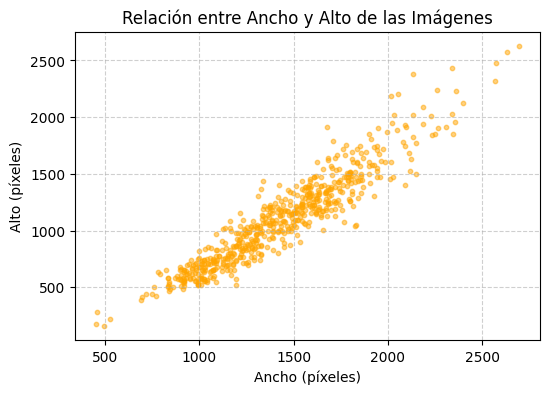

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(ancho, alto, alpha=0.5, s=10, color='orange')
plt.title('Relación entre Ancho y Alto de las Imágenes')
plt.xlabel('Ancho (píxeles)')
plt.ylabel('Alto (píxeles)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Dado el desbalance de datos y que luego de probar entrenar el modelo no hubo buena respuesta se procedio a hacer un ajuste, primero se tomaron todas las iamgenes de normal a una carpeta para crear nuevas imagenes con data augmentation, es decir artificialmente crear nuevas imagenes a partir de las existentes y emparejarlas con la cantidad de pneumonia

In [1]:
# mover todas las imagenes de neumonia y normal una sola carpeta para cada clase
import os
import shutil

# Define las rutas de origen y destino
origen_1 = "chest_xray/train/PNEUMONIA"
origen_2 = "chest_xray/val/PNEUMONIA"
origen_3 = "chest_xray/test/PNEUMONIA"
destino_neu = "chest_xray/NEUMONIA_all"
os.makedirs(destino_neu, exist_ok=True)  # Crea la carpeta de destino si no existe

# Mueve todas las imágenes de la carpeta de origen a la carpeta de destino
for origen_neu in [origen_1, origen_2, origen_3]:
    for filename in os.listdir(origen_neu):
        if filename.endswith(".jpeg"):  # Asegura que solo se muevan archivos de imagen
            shutil.move(os.path.join(origen_neu, filename), os.path.join(destino_neu, filename))

total_neu = len(os.listdir(destino_neu))
print(f"{total_neu} imegenes en {destino_neu}")

# Define las rutas de origen y destino
origen1 = "chest_xray/train/NORMAL"
origen2 = "chest_xray/val/NORMAL"
origen3 = "chest_xray/test/NORMAL"
destino = "chest_xray/NORMAL_all"
os.makedirs(destino, exist_ok=True)  # Crea la carpeta de destino si no existe

# Mueve todas las imágenes de la carpeta de origen a la carpeta de destino
for origen in [origen1, origen2, origen3]:
    for filename in os.listdir(origen):
        if filename.endswith(".jpeg"):  # Asegura que solo se muevan archivos de imagen
            shutil.move(os.path.join(origen, filename), os.path.join(destino, filename))

total_normal = len(os.listdir(destino))
print(f"{total_normal} imegenes en {destino}")

4273 imegenes en chest_xray/NEUMONIA_all
1583 imegenes en chest_xray/NORMAL_all


In [2]:
#generar nuevas imagenes con data augmentation, es decir artificialmente crear nuevas imagenes a partir de las existentes
# este codigo solo se corre una vez!

import torchvision.transforms as transforms
from tqdm import tqdm
from PIL import Image



# Transformaciones para aumentar datos
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),   # voltear horizontalmente
    transforms.RandomRotation(degrees=5),    # rotar hasta ±5°
    transforms.RandomResizedCrop(size=(1100,1400), scale=(0.9, 1.1)),  # pequeños zooms y recortes, usando la resolucion promedio encontrada anteriormente
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # variar brillo y contraste
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)), # pequeñas traslaciones
    transforms.ToTensor()
])

dir_entrada= "chest_xray/NORMAL_all"
dir_salida= "chest_xray/NORMAL_all_new"
nuevas_imagenes=2687 # numero de imagenes para igualar neumonia
os.makedirs(dir_salida, exist_ok=True)

images = os.listdir(dir_entrada)
for i in tqdm(range(nuevas_imagenes)): # tqdm para mostrar una barra de progreso
    img_name = images[i % len(images)] # reutiliza imágenes si hace falta
    img_path = os.path.join(dir_entrada, img_name) # ruta completa de la imagen
    image = Image.open(img_path).convert("L") # "L" si son en blanco y negro (rayos X)
    
    augmented = augmentation_transforms(image) # aplicar funcion generando un tensor
    augmented = transforms.ToPILImage()(augmented) # convierte las transformaciones (tensor) a imagenes

    new_name = f"aug_{i}_{img_name}" # crear nombre
    augmented.save(os.path.join(dir_salida, new_name)) #guardarla en el directorio con nombre

# mover el nuevo conjunto de datos a la carpeta normal de train

import shutil

# Mover imágenes augmentadas a la carpeta NORMAL original
for file_name in os.listdir(dir_salida):
    src_path = os.path.join(dir_salida, file_name)
    dst_path = os.path.join(dir_entrada, file_name)
    shutil.move(src_path, dst_path)


os.rmdir(dir_salida) # elimina la carpeta creada





100%|██████████| 2687/2687 [01:29<00:00, 29.93it/s]


In [3]:
# dado el desbalance se hace un calculo para que el conjunto quede mas o menos 70/15/15 para train/val/test
# total: 4273 de neumo y 4273 de normal
# haciendo el calculo se usarian 640 imagenes tanto de neumonia como de normal para val y test

import random

ruta = "chest_xray"

categorias = ["NORMAL_all", "NEUMONIA_all"]
n_test = 640
n_val = 640


def repartir_imagenes(origen, destino_cat): #funcion para repartir
    # Obtener lista de imágenes y barajar aleatoriamente
    imagenes = os.listdir(origen)
    random.shuffle(imagenes)

    # Seleccionar para test y val
    test_imgs = imagenes[:n_test]
    val_imgs = imagenes[n_test:n_test+n_val]
    train_imgs = imagenes[n_test+n_val:]

    # Función para mover imágenes a su carpeta destino
    def mover(lista, split):
        destino = os.path.join(ruta, split, destino_cat)
        for img in lista:
            shutil.move(os.path.join(origen, img), os.path.join(destino, img))

    # Mover
    mover(test_imgs, "test")
    mover(val_imgs, "val")
    mover(train_imgs, "train")

    print(f"[{destino_cat}] Test: {len(test_imgs)} | Val: {len(val_imgs)} | Train: {len(train_imgs)}")

# repartir a las carpetas
repartir_imagenes(os.path.join(ruta, "NORMAL_all"), "NORMAL")
repartir_imagenes(os.path.join(ruta, "NEUMONIA_all"), "PNEUMONIA")


# Elimina las carpetas temporales si ya están vacías
for cat in categorias:
    cat_path = os.path.join(ruta, cat)
    if os.path.exists(cat_path) and not os.listdir(cat_path):
        os.rmdir(cat_path)


[NORMAL] Test: 640 | Val: 640 | Train: 2990
[PNEUMONIA] Test: 640 | Val: 640 | Train: 2993


In [4]:
import os

for subdir in ['train', 'val', 'test']: 
    total_conjunto = 0
    print(f"Conjunto: {subdir}")
    for cat in os.listdir(os.path.join(ruta, subdir)): 
        path = os.path.join(ruta, subdir, cat)
        num = len(os.listdir(path))
        total_conjunto += num
        print(f"    {cat}: {num} imágenes")
    print(f"Total en {subdir}: {total_conjunto} imágenes")

Conjunto: train
    NORMAL: 2990 imágenes
    PNEUMONIA: 2993 imágenes
Total en train: 5983 imágenes
Conjunto: val
    NORMAL: 640 imágenes
    PNEUMONIA: 640 imágenes
Total en val: 1280 imágenes
Conjunto: test
    NORMAL: 640 imágenes
    PNEUMONIA: 640 imágenes
Total en test: 1280 imágenes


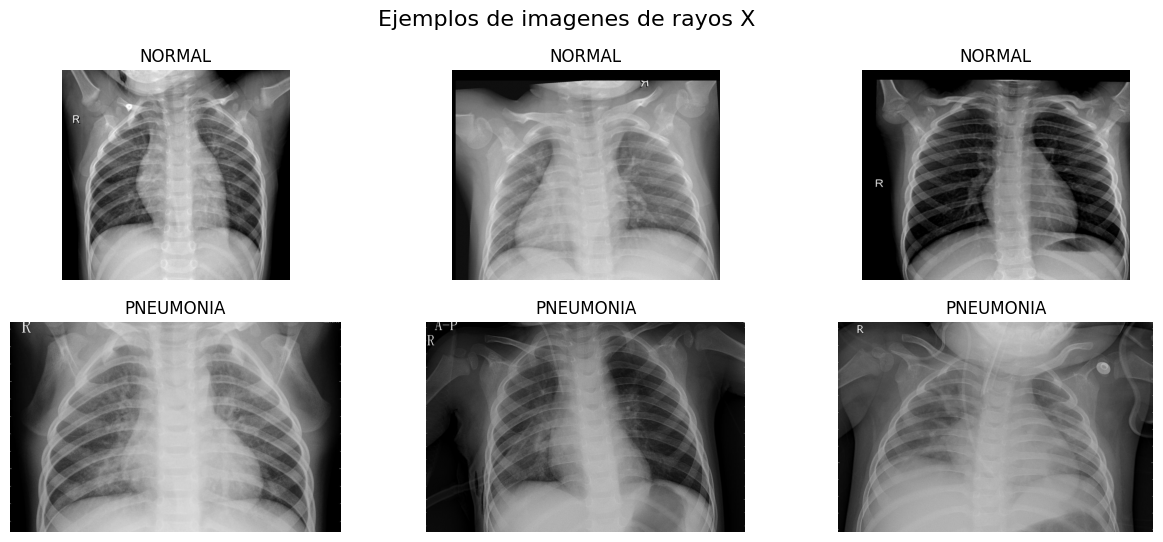

In [5]:
import random
import numpy as np
from PIL import Image # esta librería permite abrir y manipular imágenes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 6)) # Crea una figura con una cuadrícula de 2 filas y 3 columnas para mostrar las imágenes
fig.suptitle('Ejemplos de imagenes de rayos X', fontsize=16) # Título general para la figura
for i, category in enumerate(['NORMAL', 'PNEUMONIA']): # Recorre las categorías NORMAL y PNEUMONIA
    path = os.path.join(ruta, 'train', category) # Define en cual conjunto buscar las imagenes
    images = os.listdir(path) # Lista todas las imagenes en la carpeta
    selected_images = random.sample(images, 3) # Selecciona aleatoriamente 3 imágenes de la lista
    for j, img_name in enumerate(selected_images): # Recorre las imágenes seleccionadas
        img_path = os.path.join(path, img_name) # Construye la ruta completa a la imagen
        img = Image.open(img_path) # Abre la imagen usando PIL
        axes[i, j].imshow(img, cmap='gray') # Muestra la imagen en el subplot correspondiente, en escala de grises
        axes[i, j].set_title(f"{category}") # Establece el título del subplot con el nombre de la categoría
        axes[i, j].axis('off') # Oculta los ejes para una mejor visualización

2. Implementación de DataLoader 

In [6]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

ruta= 'chest_xray'
# Definir las transformaciones para las imágenes, es un tipo de normalización y preprocesamiento
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises, por si alguna imagen no lo está
    transforms.Resize((224, 224)),  # Redimensionar las imágenes a 224x224 píxeles
    transforms.ToTensor(),          # Convertir las imágenes a tensores, pasa de [0, 255] (rango de color) a [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalizar las imágenes entre -1 y 1, es decir, (valor - media) / desviación estándar
])

# Cargar los conjuntos de datos utilizando ImageFolder el cual asume que las imágenes están organizadas en carpetas por clase, en este caso NORMAL y PNEUMONIA
train_data = datasets.ImageFolder(os.path.join(ruta, 'train'), transform=transform)
val_data = datasets.ImageFolder(os.path.join(ruta, 'val'), transform=transform)
test_data = datasets.ImageFolder(os.path.join(ruta, 'test'), transform=transform)

# Crear los DataLoaders para manejar el batching y el shuffling de los datos, cuando es true los datos se mezclan aleatoriamente en cada época
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)      
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)   

In [7]:
# prueba para ver un batch de datos

# Tomar un lote de entrenamiento
imagenes, etiquetas = next(iter(train_loader)) # primer lote de datos del DataLoader de entrenamiento

print("Forma del lote de imágenes:", imagenes.shape)  # [batch_size, canales(color), alto, ancho]
print("Etiquetas:", etiquetas)
print("Clases:", train_data.classes)


Forma del lote de imágenes: torch.Size([32, 1, 224, 224])
Etiquetas: tensor([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0])
Clases: ['NORMAL', 'PNEUMONIA']


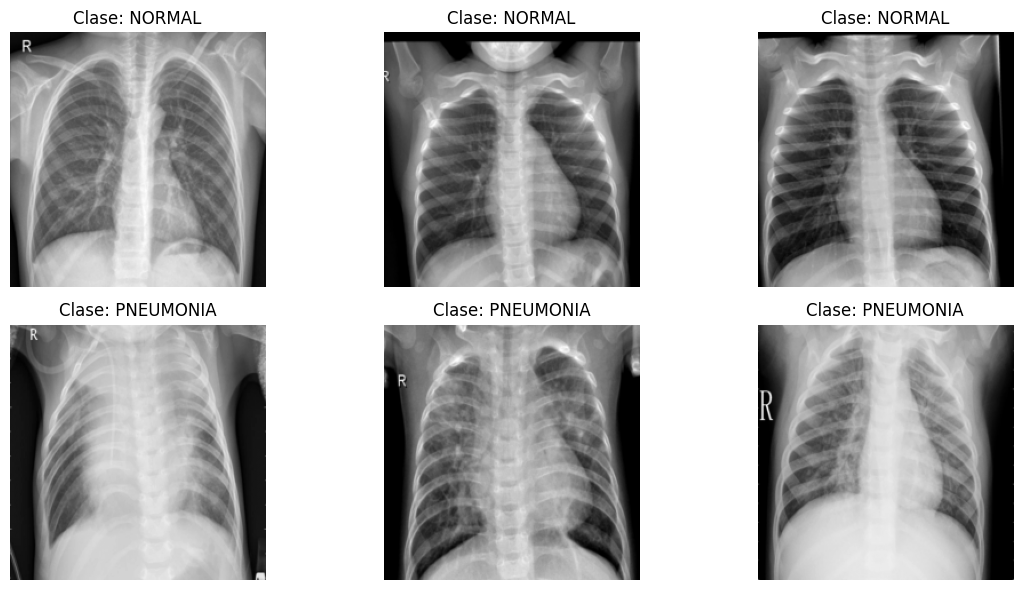

In [8]:
#visualizar que las imagenes se cargaron correctamente

clases = train_data.classes # Obtener nombres de las clases

def mostrar_imagen(img_tensor, etiqueta): # Función para mostrar una imagen a partir de un tensor y su etiqueta
    img = img_tensor.numpy().squeeze() # quitar el canal innecesario, es decir, de (1, 224, 224) a (224, 224)
    img = (img * 0.5) + 0.5 # "Desnormalizar" (porque normalizamos antes)
    plt.imshow(img, cmap='gray') # Mostrar la imagen en escala de grises
    plt.title(f"Clase: {clases[etiqueta]}") 
    plt.axis('off')


plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    mostrar_imagen(imagenes[i], etiquetas[i]) # Mostrar las primeras 6 imágenes del lote con sus etiquetas
plt.tight_layout()
plt.show()


3. Arquitectura de la Red Convolucional (CNN) 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# bloque inspirado en InceptionV3, concatena las salidas de varias convoluciones con diferentes tamaños de kernel
class MiniInception(nn.Module): # funcion de inception pero mas pequeña
    def __init__(self, in_channels, out_channels): # define metodo de contruccion, canlaes de entrada y de salida
        super().__init__() # llama al constructor de la clase base nn.Module
        self.branch1 = nn.Conv2d(in_channels, out_channels, kernel_size=1) # primera rama con convolucion 1x1, detecta patrones finos

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1) # segunda rama con convolucion 3x3, detecta patrones medianos
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2) # tercera rama con convolucion 5x5, detecta patrones grandes
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1), # cuarta rama con max pooling 3x3, resalta las características más importantes, extrae el valor maximo
            nn.Conv2d(in_channels, out_channels, kernel_size=1)  # seguido de una convolución 1x1 para reducir la dimensionalidad
        )

    def forward(self, x): # define el metodo de propagacion hacia adelante y pasa las entradas por cada rama
        out1 = self.branch1(x) 
        out2 = self.branch2(x) 
        out3 = self.branch3(x)
        out4 = self.branch4(x)
        return torch.cat([out1, out2, out3, out4], dim=1) # concatenar las salidas de las 4 ramas a lo largo del canal
    

# Bloque Residual inspirado en ResNet, suma la entrada a la salida para facilitar el aprendizaje, la red decta cuando no hay resultados buenos y salta esas capas
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, padding=1) # primera convolución 3x3
        self.bn1 = nn.BatchNorm2d(channels) # normalización por lotes
        self.conv2 = nn.Conv2d(channels, channels, 3, padding=1) # segunda convolución 3x3
        self.bn2 = nn.BatchNorm2d(channels) # normalización por lotes

    def forward(self, x):
        identity = x # guardar la entrada original
        out = F.relu(self.bn1(self.conv1(x))) # primera convolución + batch norm + ReLU
        out = self.bn2(self.conv2(out)) # segunda convolución + batch norm
        out += identity # suma la entrada original a la salida
        return F.relu(out) #aplica la funcion de activacion ReLU a la salida
    

# Bloque inspirado en DenseNet, cada capa recibe las características de todas las capas anteriores
class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate=32, layers=3): # growth_rate es el numero de canales que se agregan por cada capa, es decir, si growth_rate=32 y layers=3, se agregan 96 canales en total, los canales hace referencia a las caracteristicas que se extraen de la imagen
        super().__init__()
        self.layers = nn.ModuleList()
        channels = in_channels
        for _ in range(layers): # crea las capas convolucionales dentro del bloque denso
            self.layers.append(nn.Conv2d(channels, growth_rate, 3, padding=1)) # cada capa agrega growth_rate canales
            channels += growth_rate # actualiza el numero de canales totales
        self.bottleneck = nn.Conv2d(channels, 128, 1) # capa de cuello de botella para reducir la dimensionalidad

    def forward(self, x): # en la propagacion hacia adelante, cada capa recibe las caracteristicas de todas las capas anteriores
        features = [x] # lista para almacenar las características de todas las capas
        for layer in self.layers: # recorre cada capa convolucional en el bloque denso
            out = F.relu(layer(torch.cat(features, 1))) # concatena las características de todas las capas anteriores y aplica la convolución seguida de ReLU
            features.append(out) # agrega la salida actual a la lista de características
        return self.bottleneck(torch.cat(features, 1)) # reduce la dimensionalidad con la capa de cuello de botella

# Modelo final
class FinalCNN(nn.Module): # define la arquitectura completa de la red neuronal convolucional personalizada
    def __init__(self): # constructor de la clase
        super().__init__()
        self.initial = nn.Sequential( # bloque inicial de convolución, batch norm, ReLU y max pooling
            nn.Conv2d(1, 32, 3, padding=1), #convolución inicial 3x3
            nn.BatchNorm2d(32), # normalización por lotes
            nn.ReLU(), # función de activación ReLU
            nn.MaxPool2d(2) # reduce la dimensionalidad a la mitad, es decir, de 224x224 a 112x112
        )
        self.inception = MiniInception(32, 16) # bloque Inception con 32 canales de entrada y 16 de salida por rama
        self.residual = ResidualBlock(16*4)  # bloque residual con 64 canales (16*4 por las 4 ramas del Inception)
        self.dense = DenseBlock(16*4, growth_rate=16, layers=3) # bloque denso con 64 canales de entrada, tasa de crecimiento de 16 y 3 capas
        self.dropout_dense = nn.Dropout(0.3) # capa de dropout para reducir el sobreajuste
        self.gap = nn.AdaptiveAvgPool2d((1, 1)) # global average pooling para reducir cada mapa de características a un solo valor, es decir a un vector de tamaño fijo
        self.fc1 = nn.Linear(128, 128) # capa totalmente conectada con 128 neuronas
        self.dropout = nn.Dropout(0.5) # capa de dropout para reducir el sobreajuste
        self.fc2 = nn.Linear(128, 2) # capa de salida con 2 neuronas (una por clase: NORMAL y PNEUMONIA)

    def forward(self, x): # define la propagación hacia adelante a través de todos los bloques
        x = self.initial(x) # pasa por el bloque inicial
        x = self.inception(x) # pasa por el bloque Inception
        x = self.residual(x) # pasa por el bloque residual
        x = self.dense(x) # pasa por el bloque dense
        x = self.dropout_dense(x) # aplica dropout despues del bloque denso
        x = self.gap(x) # aplica global average pooling
        x = torch.flatten(x, 1) # aplana el tensor para la capa totalmente conectada
        x = F.relu(self.fc1(x)) # pasa por la primera capa totalmente conectada con ReLU
        x = self.dropout(x) # aplica dropout
        x = self.fc2(x) # pasa por la capa de salida
        return x # devuelve las puntuaciones sin normalizar para cada clase
    



In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Configura el dispositivo para usar GPU si está disponible, de lo contrario usa CPU

model = FinalCNN().to(device)
print(model)


FinalCNN(
  (initial): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (inception): MiniInception(
    (branch1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
    (branch2): Sequential(
      (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (branch3): Sequential(
      (0): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (branch4): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (residual): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [11]:
# Contar y mostrar el número de parámetros entrenables en el modelo, para tener una idea de la complejidad del modelo y evitar overfitting o underfitting
# Overfitting → pocos datos y modelo muy grande → el modelo “memoriza” en lugar de aprender
# Underfitting → muchos datos y modelo demasiado pequeño → el modelo no logra captar patrones

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Parámetros entrenables: {total_params}")


Parámetros entrenables: 158834


In [12]:
#prueba con un batch de datos

for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    print("Salida:", outputs.shape)
    break


Salida: torch.Size([32, 2])


4. Entrenamiento del modelo 

In [17]:
import torch.optim as optim

weights = torch.tensor([0.7, 0.3], dtype=torch.float) # pesos manuales para cada clase, en este caso se le da mayor peso a la clase NORMAL (0) que a la clase PNEUMONIA (1)
criterion = nn.CrossEntropyLoss(weight=weights.to(device)) # función de pérdida para clasificación multiclase en este caso es adecuada porque tenemos dos clases (NORMAL y PNEUMONIA)
optimizer = optim.Adam(model.parameters(), lr=0.001) # optimizador Adam, ajusta los pesos de la red para minimizar la pérdida


In [ ]:
num_epochs = 12 # número de épocas para entrenar el modelo

for epoch in range(num_epochs): 
    model.train() # pone el modelo en modo de entrenamiento
    running_loss = 0.0 # inicializa la pérdida acumulada
    correct = 0 # inicializa el contador de predicciones correctas
    total = 0 # inicializa el contador total de muestras

    for images, labels in train_loader: # recorre cada lote de datos en el DataLoader de entrenamiento
        images, labels = images.to(device), labels.to(device) # mueve las imágenes y etiquetas al dispositivo (GPU o CPU)

        optimizer.zero_grad() # limpia los gradientes acumulados de la iteración anterior
        outputs = model(images) # realiza la propagación hacia adelante
        loss = criterion(outputs, labels) # calcula la pérdida entre las predicciones y las etiquetas reales
        loss.backward() # realiza la propagación hacia atrás para calcular los gradientes
        optimizer.step() # actualiza los pesos del modelo

        running_loss += loss.item() # acumula la pérdida del lote actual, para calcular la pérdida promedio al final de la época
        _, predicted = torch.max(outputs.data, 1) # obtiene las predicciones del modelo (la clase con la puntuación más alta)
        total += labels.size(0) # actualiza el contador total de muestras
        correct += (predicted == labels).sum().item() # actualiza el contador de predicciones correctas

    train_acc = 100 * correct / total # calcula la precisión del entrenamiento como el porcentaje de predicciones correctas
    train_loss = running_loss / len(train_loader) # calcula la pérdida promedio del entrenamiento

    if epoch == 10: #cuando la epoca es igual a 10 se hace un ajuste en la tasa de aprendizaje
        for g in optimizer.param_groups:
            g['lr'] = 0.0001  # bajamos la LR para afinar

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Loss: {train_loss:.4f}, "
          f"Accuracy: {train_acc:.2f}%")
    
    # Validación después de cada época de entrenamiento
    model.eval() # pone el modelo en modo de evaluación
    val_loss = 0.0 # inicializa la pérdida de validación acumulada
    val_correct = 0 # inicializa el contador de predicciones correctas en validación
    val_total = 0  # inicializa el contador total de muestras en validación

    with torch.no_grad():  # no calcula gradientes durante la validación
        for images, labels in val_loader: # recorre cada lote de datos en el DataLoader de validación
            images, labels = images.to(device), labels.to(device) # mueve las imágenes y etiquetas al dispositivo
            outputs = model(images) # realiza la propagación hacia adelante
            loss = criterion(outputs, labels) # calcula la pérdida
            val_loss += loss.item() # acumula la pérdida de validación

            _, predicted = torch.max(outputs.data, 1) # obtiene las predicciones del modelo
            val_total += labels.size(0) # actualiza el contador total de muestras en validación
            val_correct += (predicted == labels).sum().item() # actualiza el contador de predicciones correctas en validación
    val_acc = 100 * val_correct / val_total # calcula la precisión de validación
    val_loss = val_loss / len(val_loader) # calcula la pérdida promedio de validación
    print(f"   Validación - Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%\n")



Epoch [1/12], Loss: 0.1408, Accuracy: 94.03%
   Validación - Loss: 0.1226, Accuracy: 95.31%

Epoch [2/12], Loss: 0.1361, Accuracy: 93.78%
   Validación - Loss: 0.1259, Accuracy: 95.39%

Epoch [3/12], Loss: 0.1343, Accuracy: 94.07%
   Validación - Loss: 0.2050, Accuracy: 92.81%

Epoch [4/12], Loss: 0.1246, Accuracy: 94.72%
   Validación - Loss: 0.1377, Accuracy: 95.47%

Epoch [5/12], Loss: 0.1257, Accuracy: 94.32%
   Validación - Loss: 0.1320, Accuracy: 95.39%

Epoch [6/12], Loss: 0.1291, Accuracy: 94.35%
   Validación - Loss: 0.1420, Accuracy: 94.77%

Epoch [7/12], Loss: 0.1209, Accuracy: 94.95%
   Validación - Loss: 0.1594, Accuracy: 93.20%

Epoch [8/12], Loss: 0.1284, Accuracy: 94.38%
   Validación - Loss: 1.7096, Accuracy: 54.22%

Epoch [9/12], Loss: 0.1165, Accuracy: 94.92%
   Validación - Loss: 0.1124, Accuracy: 95.78%

Epoch [10/12], Loss: 0.1070, Accuracy: 95.64%
   Validación - Loss: 0.2505, Accuracy: 90.86%

Epoch [11/12], Loss: 0.1083, Accuracy: 95.19%
   Validación - Loss: 0

In [22]:
#guardar el modelo entrenado
torch.save(model.state_dict(), 'modelo_entrenado.pth') # guarda los pesos del modelo entrenado en un archivo .pth


In [ ]:
#cargar el modelo entrenado
model.load_state_dict(torch.load('modelo_entrenado.pth')) # carga los pesos del modelo desde el archivo .pth

Informe de Clasificación:
               precision    recall  f1-score   support

      NORMAL       0.96      0.98      0.97       640
   PNEUMONIA       0.98      0.95      0.97       640

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280



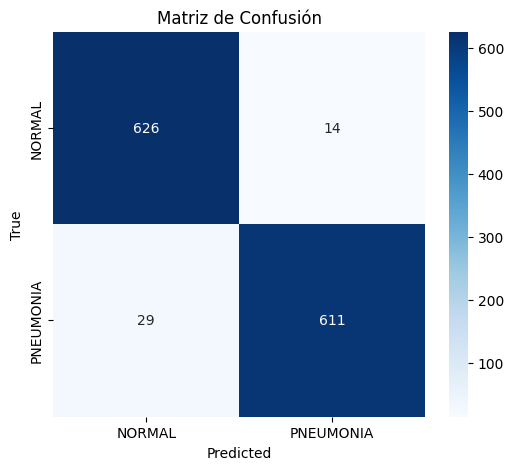

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

model.eval() # pone el modelo en modo de evaluación
all_labels = [] # lista para almacenar todas las etiquetas reales
all_preds = [] # lista para almacenar todas las predicciones del modelo

with torch.no_grad(): # no calcula gradientes durante la evaluación
    for images, labels in val_loader: # recorre cada lote de datos en el DataLoader de validacion
        images, labels = images.to(device), labels.to(device) # mueve las imágenes y etiquetas al dispositivo
        outputs = model(images) # realiza la propagación hacia adelante
        _, predicted = torch.max(outputs.data, 1) # obtiene las predicciones del modelo
        all_labels.extend(labels.cpu().numpy()) # agrega las etiquetas reales a la lista (moviéndolas a CPU y convirtiéndolas a numpy)
        all_preds.extend(predicted.cpu().numpy()) # agrega las predicciones a la lista (moviéndolas a CPU y convirtiéndolas a numpy)

# Generar el informe de clasificación
report = classification_report(all_labels, all_preds, target_names=val_data.classes)
print("Informe de Clasificación:\n", report)

# Matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.classes, yticklabels=val_data.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

5. Evaluacion de resultados


Reporte de clasificacion:
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.96       640
   PNEUMONIA       0.98      0.95      0.96       640

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



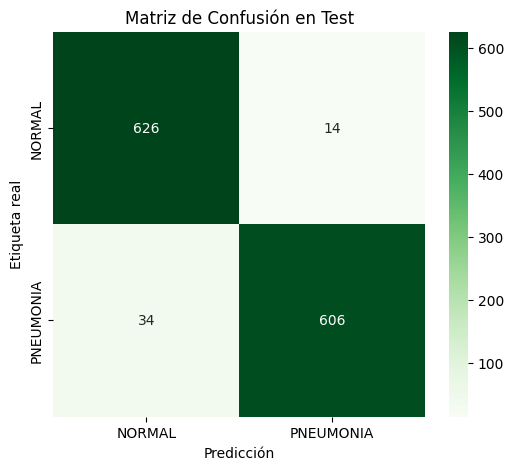

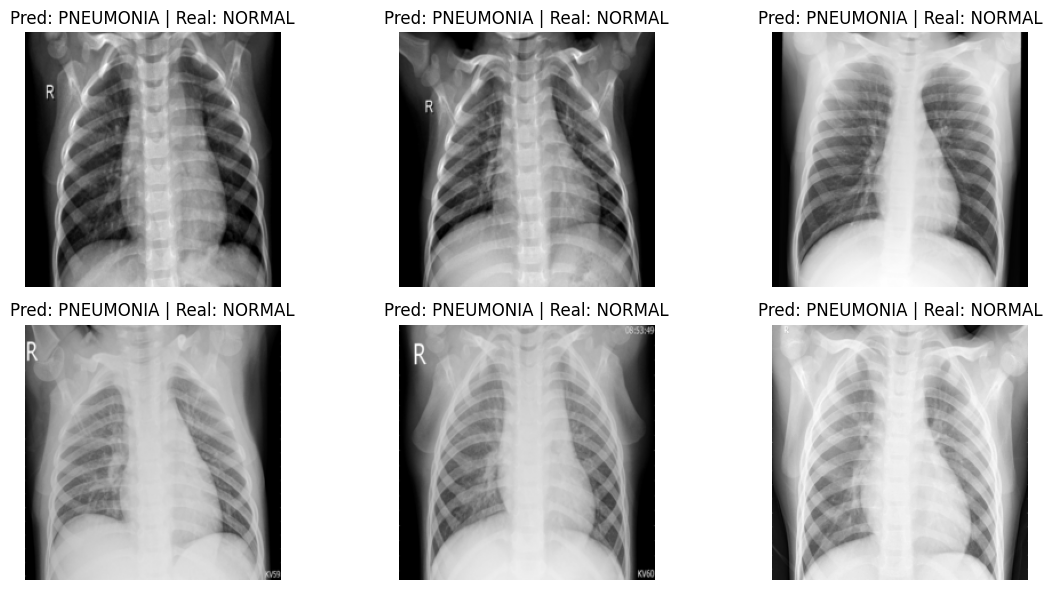

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


model.eval()

all_labels = [] # etiquetas reales
all_preds = [] # predicciones del modelo
misclassified_imgs = [] # imagenes mal clasificadas
misclassified_preds = [] # predicciones de las imagenes mal clasificadas
misclassified_labels = [] # etiquetas reales de las imagenes mal clasificadas
num_error_images = 6  # numero de imagenes mal clasificadas a mostrar
class_names = test_data.classes  # Nombres de las clases, en este caso ['NORMAL', 'PNEUMONIA']

with torch.no_grad(): # no calcula gradiente
    for images, labels in test_loader: # recorre cada lote de datos en el DataLoader de prueba
        images, labels = images.to(device), labels.to(device) # mueve las imágenes y etiquetas al dispositivo
        outputs = model(images) # realiza la propagación hacia adelante
        _, preds = torch.max(outputs, 1) # predicciones del modelo

        # Guardar etiquetas y predicciones
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        # Guardar imágenes mal clasificadas
        for img, pred, true_label in zip(images, preds, labels):
            if pred != true_label and len(misclassified_imgs) < num_error_images:
                misclassified_imgs.append(img.cpu())
                misclassified_preds.append(pred.cpu())
                misclassified_labels.append(true_label.cpu())

# imprimir metricas
print("\nReporte de clasificacion:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión en Test')
plt.show()

# Visualizar imagenes mal clasificadas
if misclassified_imgs:
    plt.figure(figsize=(12, 6))
    for i in range(len(misclassified_imgs)):
        img = misclassified_imgs[i]
        pred = misclassified_preds[i].item()
        true = misclassified_labels[i].item()

        plt.subplot(2, 3, i+1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"Pred: {class_names[pred]} | Real: {class_names[true]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
